## **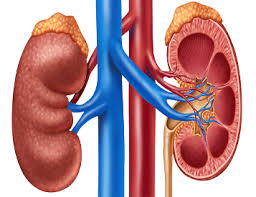KIDNEY CONDITION DIAGNOSIS**

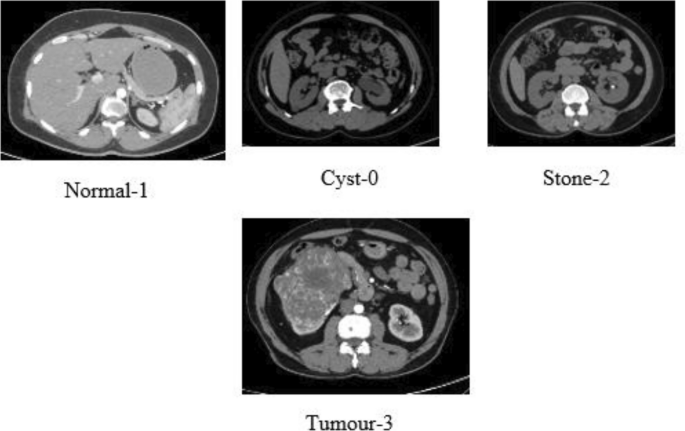

A healthy kidney performs vital functions such as filtering waste products from the blood,regulating electrolyte balance, and maintaining fluid balance.It is roughly the size of a fist and has a smooth, bean-shaped appearance.
          

**Kidney Stones** (Nephrolithiasis): Small, hard deposits that form in the kidneys and can cause severe pain when passing through the urinary tract.

**Kidney Tumors**: Abnormal growths or masses in the kidney tissue, which can be either benign (non-cancerous) or malignant (cancerous).

**Kidney cysts** or Polycystic Kidney Disease (PKD): A genetic disorder characterized by the growth of numerous fluid-filled cysts in the kidneys, leading to kidney enlargement and potential kidney failure.

**Normal kidney**: kidney should function without causing any significant symptoms or complications.

# **1.Import necessary libraries**

In [1]:
!pip install split-folders

In [2]:
import pandas as pd
import numpy as np
import os
import splitfolders

from skimage.io import imread
from skimage.transform import resize

from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


list out all the  directories in the specified directory.





In [3]:
os.listdir("/content/drive/MyDrive/study/project2/Kidney_dataset")

['Normal', 'Stone', 'Tumor', 'Cyst']

**Frequency of each class in the dataset**

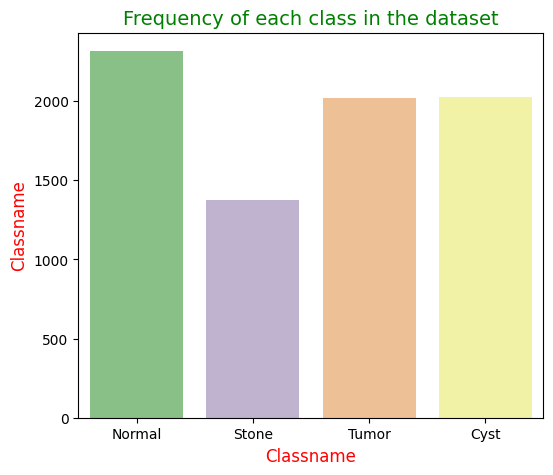

In [4]:
class_names=['Normal', 'Stone', 'Tumor', 'Cyst']

normal=len(os.listdir('/content/drive/MyDrive/study/project2/Kidney_dataset/Normal'))
stone=len(os.listdir('/content/drive/MyDrive/study/project2/Kidney_dataset/Stone'))
tumor=len(os.listdir('/content/drive/MyDrive/study/project2/Kidney_dataset/Tumor'))
cyst=len(os.listdir('/content/drive/MyDrive/study/project2/Kidney_dataset/Cyst'))

images=[normal,stone,tumor,cyst]

plt.figure(figsize=(6,5))
sns.barplot(x=class_names,y=images,palette='Accent')
plt.title('Frequency of each class in the dataset',fontsize=14,color='green')
plt.xlabel('Classname',fontsize=12,color='red')
plt.ylabel('Classname',fontsize=12,color='red')
plt.show()



# **2.Split dataset for training and testing**






In [5]:
# Specify the input directory containing the data
input_folder='/content/drive/MyDrive/study/project2/Kidney_dataset'

# Specify the path where you want to save the split datasets
outer_folder='/content/drive/MyDrive/study/project2/Split'



*   check the counts of images in each split folder



In [6]:
# Use splitfolders to split the data
splitfolders.ratio(input_folder,outer_folder,ratio=(0.7,0,0.3),seed=42)

Copying files: 7738 files [57:28,  2.24 files/s]


In [7]:
dir="/content/drive/MyDrive/study/project2/Split"
l=['train', 'val', 'test']
for i in l:
  paths=os.path.join(dir,i)
  print('***********************',i,'******************')
  class_dir=os.listdir(paths)
  for j in class_dir:
    class_path=os.path.join(paths,j)
    class_img=os.listdir(class_path)
    print("count of images in",j,"=",len(class_img))
    print()


*********************** train ******************
count of images in Normal = 1621

count of images in Stone = 963

count of images in Tumor = 1414

count of images in Cyst = 1416

*********************** val ******************
count of images in Normal = 0

count of images in Stone = 0

count of images in Tumor = 0

count of images in Cyst = 0

*********************** test ******************
count of images in Normal = 696

count of images in Stone = 414

count of images in Tumor = 606

count of images in Cyst = 608



In [8]:
os.listdir('/content/drive/MyDrive/study/project2/Split/train')

['Normal', 'Stone', 'Tumor', 'Cyst']

In [9]:
os.listdir('/content/drive/MyDrive/study/project2/Split/test')

['Normal', 'Stone', 'Tumor', 'Cyst']

# **3.Prepare data**

**Prepare Dataset for Training**

In [10]:
train="/content/drive/MyDrive/study/project2/Split/train"
X_train=[]
y_train=[]
labels=['Normal', 'Stone', 'Tumor', 'Cyst']
for i in labels:
  print('Loading..........',i)
  path=os.path.join(train,i)
  images=os.listdir(path)
  for j in images:
    img_path=os.path.join(path,j)
    img_array=imread(img_path)
    img_resize=resize(img_array,(150,150,1))
    X_train.append(img_resize)
    y_train.append(labels.index(i))
  print('Loading Complted..........',i)


Loading.......... Normal
Loading Complted.......... Normal
Loading.......... Stone
Loading Complted.......... Stone
Loading.......... Tumor
Loading Complted.......... Tumor
Loading.......... Cyst
Loading Complted.......... Cyst


**Prepare Dataset for Testing**

In [11]:
test="/content/drive/MyDrive/study/project2/Split/test"
X_test=[]
y_test=[]
labels=['Normal', 'Stone', 'Tumor', 'Cyst']
for i in labels:
  print('Loading..........',i)
  path=os.path.join(test,i)
  images=os.listdir(path)
  for j in images:
    img_path=os.path.join(path,j)
    img_array=imread(img_path)
    img_resize=resize(img_array,(150,150,1))
    X_test.append(img_resize)
    y_test.append(labels.index(i))
  print('Loading Complted..........',i)

Loading.......... Normal
Loading Complted.......... Normal
Loading.......... Stone
Loading Complted.......... Stone
Loading.......... Tumor
Loading Complted.......... Tumor
Loading.......... Cyst
Loading Complted.......... Cyst


**convert list into array**

In [12]:
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

**check the shape of X_train,X_test,y_train,y_test**

In [13]:
X_train.shape,X_test.shape

((5414, 150, 150, 1), (2324, 150, 150, 1))

In [14]:
y_train.shape,y_test.shape

((5414,), (2324,))

# **4.Model Creation**

In [15]:
model=Sequential()

model.add(Conv2D(35,(3,3),input_shape=(150,150,1),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(35,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))


model.add(Flatten())

model.add(Dense(50,activation='relu'))

model.add(Dense(4,activation='softmax'))

**compile**

In [16]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

**fit model**

In [17]:
r=model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=100)

Epoch 1/10
55/55 [==============================] - 11s 87ms/step - loss: 0.5279 - accuracy: 0.7902 - val_loss: 0.1015 - val_accuracy: 0.9664
Epoch 2/10
55/55 [==============================] - 3s 49ms/step - loss: 0.0261 - accuracy: 0.9961 - val_loss: 0.0117 - val_accuracy: 0.9991
Epoch 3/10
55/55 [==============================] - 3s 55ms/step - loss: 0.0042 - accuracy: 0.9994 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 4/10
55/55 [==============================] - 3s 49ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 9.2349e-04 - val_accuracy: 1.0000
Epoch 5/10
55/55 [==============================] - 3s 50ms/step - loss: 5.1891e-04 - accuracy: 1.0000 - val_loss: 6.5663e-04 - val_accuracy: 1.0000
Epoch 6/10
55/55 [==============================] - 3s 50ms/step - loss: 3.7198e-04 - accuracy: 1.0000 - val_loss: 4.7911e-04 - val_accuracy: 1.0000
Epoch 7/10
55/55 [==============================] - 3s 49ms/step - loss: 2.7478e-04 - accuracy: 1.0000 - val_loss: 3.7858e-04 - val_a

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 35)      350       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 35)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 35)        11060     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 35)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 45360)             0         
                                                                 
 dense (Dense)               (None, 50)                2

# **5.Accuracy and loss of Model**

In [19]:
loss,accuracy=model.evaluate(X_test,y_test)
print('loss=',loss)
print('accuracy=',accuracy)

73/73 [==============================] - 1s 8ms/step - loss: 2.3650e-04 - accuracy: 1.0000
loss= 0.00023650022922083735
accuracy= 1.0


**Model Loss**


In [20]:
r.history

{'loss': [0.5278941988945007,
  0.02614745683968067,
  0.00418403884395957,
  0.0011740134796127677,
  0.0005189079674892128,
  0.0003719800733961165,
  0.00027478288393467665,
  0.0002131287328666076,
  0.00016807010979391634,
  0.00013940074131824076],
 'accuracy': [0.7901736497879028,
  0.9961211681365967,
  0.9994458556175232,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.10148218274116516,
  0.011740605346858501,
  0.004118326120078564,
  0.0009234928293153644,
  0.0006566295633092523,
  0.00047910839202813804,
  0.00037857613642700016,
  0.00030570346280001104,
  0.00025480001932010055,
  0.0002365002001170069],
 'val_accuracy': [0.9664371609687805,
  0.9991394281387329,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0]}

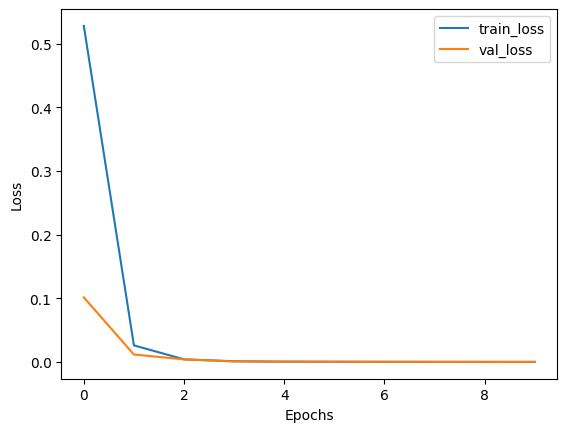

In [21]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='train_loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Model Accuracy**

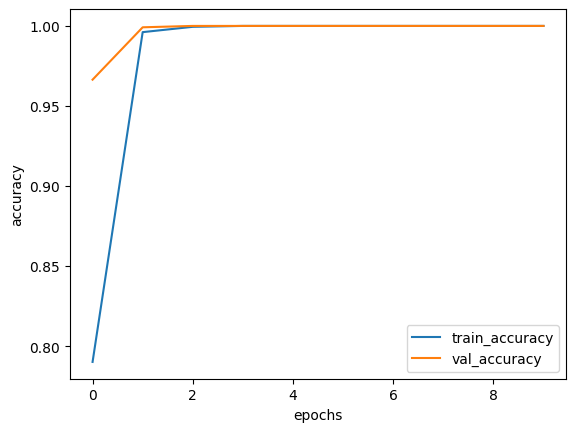

In [22]:
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'],label='train_accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

**Save The Model**

In [23]:
model.save("kidney_project.h5")

**predict new image**

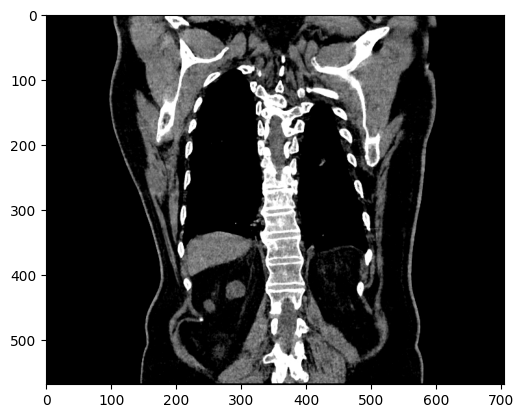

In [24]:
img=imread('/content/drive/MyDrive/study/project2/img4.jpg')
plt.imshow(img)



In [25]:
img1=resize(img,(150,150,1))
img2=img1.reshape(1,150,150,1)
img2

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]]])

In [26]:
pred=model.predict(img2)
pred


1/1 [==============================] - 0s 162ms/step


array([[6.9172259e-18, 6.1406661e-07, 2.8948199e-07, 9.9999917e-01]],
      dtype=float32)

In [27]:
maxm=pred.argmax(axis=1)
maxm


array([3])

In [28]:
if maxm==0:
  print('Normal')
elif maxm==1:
  print('Stone')
elif maxm==2:
  print('Tumor')
else:
  print('Cyst')


Cyst
